# <span style='color:orange'> PROJET DATAGONG POUR LA FORMATION EN DATA-SCIENCES DES ETUDIANTS DE 10 000 CODEURS DEC 2024 </span>




## Il s'agit d'un projet de classification binaire qui a pour objectif de prédire le parti politique victorieux des élections présidentielles de 2020 aux États-Unis. Sur la base des données sociodémographiques, nous allons construire un modèle explicatif des résultats des deux partis, à savoir :

## * Le parti Républicain (1)
## * Le parti Démocrate (0)

### À cet effet, nous disposons de plusieurs bases de données dont :
* la base du niveau d'éducation des adultes âgés de 25 ans et plus aux États-Unis, dans les États et les comtés, 1970-2019
* la base de la population estimée pour les États-Unis, les États et les comtés, 2010-19
* la base de l'estimation de la pauvreté pour les États-Unis, les États et les comtés, 2019
* la base de chômage et le revenu médian des ménages pour les États-Unis, les États et les comtés, 2000-19
* la base des résultats des élections présidentielles 2020 des USA 

Nous avons également un archive des élections de 2008 à 2016 qui nous servira dans notre analyse exploratoire ! 

Sans tarder, commençons par importer quelques bibliothèques : 

In [60]:
# Importation des librairies
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer,SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.stats import chi2_contingency, pearsonr, f_oneway

## <span style='color:green'> **Etape 1: Constituer la base de données : importation, nettoyage et construction de la base finale de travail**   </span>


1. Nous allons importer les données, les observer et les joindre pour obtenir un DataFrame exploitable. Ensuite, nous allons passer à la suppression des doublons puis au traitement des valeurs manquantes et des valeurs aberrantes. 
2. Nous allons utiliser le fichier des résultats de 2020 pour créer le target : (1) pour le Parti Républicain, (0) Pour le Parti Démocrate. Pour cela, nous avons créé une variable binaire en tenant compte du vote des républicains et des démocrates. Si le nombre de votes des républicains est supérieur à celui des démocrates, on a un, sinon 0.

In [61]:
#Importation des bases de donnée
data_education = pd.read_excel ("Education.xls", header=4)
data_population = pd.read_excel ("D:\datagongprojetedit\PopulationEstimates.xls", sheet_name= "Population Estimates 2010-19", header=2)
data_pauvreteestimé = pd.read_excel ("D:\datagongprojetedit\PovertyEstimates.xls", header=4, sheet_name= "Poverty Data 2019")
data_uneployment = pd.read_excel (r"D:\datagongprojetedit\Unemployment.xls", header= 4)
data_2020_us_country = pd.read_csv ( r"D:\datagongprojetedit\2020_US_County_Level_Presidential_Results.csv", header= 0, sep=";")
data_resutat_08_16 = pd.read_csv (r"D:\datagongprojetedit\US_County_Level_Presidential_Results_08-16.csv", header= 0, sep=';')

# Les dimensions de chaque base
all_df_list  = (data_education, data_population, data_pauvreteestimé, data_uneployment, data_2020_us_country,data_resutat_08_16)
for df_ in (all_df_list  ):
    print (df_.shape)

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\BALLOGOU Edith\AppData\Local\Temp\ipykernel_16536\379385371.py:3: SyntaxWarning: invalid escape sequence '\d'
  data_population = pd.read_excel ("D:\datagongprojetedit\PopulationEstimates.xls", sheet_name= "Population Estimates 2010-19", header=2)
C:\Users\BALLOGOU Edith\AppData\Local\Temp\ipykernel_16536\379385371.py:4: SyntaxWarning: invalid escape sequence '\d'
  data_pauvreteestimé = pd.read_excel ("D:\datagongprojetedit\PovertyEstimates.xls", header=4, sheet_name= "Poverty Data 2019")


(3283, 47)
(3273, 165)
(3193, 34)
(3275, 88)
(3152, 10)
(3112, 14)


* <span style='color:red'> La base education à 47 variables et 3283 individus </span>
* <span style='color:red'> La base de la population estimée pour les USA à 165 variables et 3273 individus </span>
* <span style='color:red'> La base de la pauvreté estimée pour les USA à 34 variables et 3193 individus </span>
* <span style='color:red'> la base de Chômage et revenu médian des ménages pour les États-Unis à 88 variables et 3275 individus </span>
* <span style='color:red'> la base des résultats des élections présidentielles 2020 des USA à 10 variables et 3152 individus </span>

1. Nous allons procéder à une fusion par étape des bases de données en utilisant des clés communes pour garantir une intégration complète des données. Pour cela nous allons uniformiser les noms des colonnes dans toutes les bases pour éviter les erreurs de correspondance. Ensuite nous allons passer à un traitement rapide de la base (supprimer les doublons et gérer les valeurs manquantes)


In [62]:
# Nous allons renommer des variables dans la base
data_population = data_population.rename (columns={'FIPS Code' : 'FIPStxt', 'Rural-urban_Continuum Code_2003' : '2003 Rural-urban Continuum Code' , 
                                                   'Urban_Influence_Code_2003' : '2003 Urban Influence Code', 'Rural-urban_Continuum Code_2013' : '2013 Rural-urban Continuum Code', 
                                                   'Urban_Influence_Code_2013' :'2013 Urban Influence Code' }) 

data_pauvreteestimé = data_pauvreteestimé.rename (columns={'Area_name' : 'Area_Name','Rural-urban_Continuum_Code_2003' : '2003 Rural-urban Continuum Code' , 'Urban_Influence_Code_2003' : '2003 Urban Influence Code',
                                                           'Rural-urban_Continuum_Code_2013' : '2013 Rural-urban Continuum Code', 'Urban_Influence_Code_2013' :'2013 Urban Influence Code'})


data_uneployment = data_uneployment.rename (columns={'fips_txt' : 'FIPStxt' , 'Stabr' : 'State', 'area_name' : 'Area_Name', 'Rural_urban_continuum_code_2013' : '2013 Rural-urban Continuum Code',
                                                     'Urban_influence_code_2013' : '2013 Urban Influence Code'})
data_2020_us_country = data_2020_us_country.rename (columns={'county_fips' : 'FIPStxt' , 'state_name' : 'State'})

# Ici nous allons faire une copie et renommer les bases avec un nom plus court
ed = data_education.copy() #copie de la base
po = data_population.copy()
pauv = data_pauvreteestimé.copy()
unep = data_uneployment.copy()
county = data_2020_us_country.copy()
result_08_16 = data_resutat_08_16.copy()

In [63]:
#jointure des bases
from functools import reduce
list_dfs = [ed, po, pauv]
df_edu_pop_pauv = reduce(lambda left, right: pd.merge(left, right, on=['FIPStxt', 'State', 'Area_Name', '2003 Rural-urban Continuum Code',
                             '2003 Urban Influence Code', '2013 Rural-urban Continuum Code', '2013 Urban Influence Code'], how='outer'), list_dfs)
df_edu_pop_pauv

df_edu_pop_pauv_unep_county = df_edu_pop_pauv.merge(unep, on= ['FIPStxt', 'State', 'Area_Name', '2013 Rural-urban Continuum Code', '2013 Urban Influence Code'], how= 'outer').merge(county, on= ['FIPStxt', 'State'], how= 'outer')
df_edu_pop_pauv_unep_county

,FIPStxt,State,Area_Name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
0,0,US,United States,NaN,NaN,NaN,NaN,52373312.0,34158051.0,11650730.0,...,65712.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,1062306.0,468269.0,136287.0,...,51771.0,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1001,AL,"Autauga County, AL",NaN,NaN,2.0,2.0,NaN,NaN,NaN,...,58233.0,112.481888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1001,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Autauga County,19838.0,7503.0,27770.0,12335.0,0.714368,0.270184,0.444184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9743,72151,PR,"Yabucoa Municipio, PR",NaN,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9744,72151,PR,"Yabucoa Municipio, Puerto Rico",1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9745,72153,PR,Yauco Municipio,3.0,2.0,2.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9746,72153,PR,"Yauco Municipio, PR",NaN,NaN,2.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# vérification des doublons à partir des identifiants 'FIPStxt' 
print(f"le nombre de doublons sur l'identifiant est:{df_edu_pop_pauv_unep_county['FIPStxt'].duplicated().sum()}")

# Trier pour mettre les lignes avec plus d'infos en premier
df_tri_ligne = df_edu_pop_pauv_unep_county.sort_values(by= 'FIPStxt')

# Grouper et combiner les valeurs en fusionnant les lignes
df_edu_pop_pauv_unep_county= df_tri_ligne.groupby('FIPStxt').apply(lambda x: x.ffill().bfill().iloc[0]).reset_index(drop=True)
df_edu_pop_pauv_unep_county


# Définir le seuil (80% de valeurs manquantes -> conserver au moins 20% de valeurs valides)
seuil_lignes = 0.2 * len(df_edu_pop_pauv_unep_county.columns)  # 20% du nombre de colonnes
seuil_colonnes = 0.2 * len(df_edu_pop_pauv_unep_county)        # 20% du nombre de lignes

# Supprimer les lignes ayant 80% de valeurs manquantes
df_cleaned_ligne80 = df_edu_pop_pauv_unep_county.dropna(thresh=seuil_lignes)

# Supprimer les colonnes ayant 80% de valeurs manquantes
df_cleaned_col80 = df_cleaned_ligne80.dropna(thresh=seuil_colonnes, axis=1)

# On constate qu'il y a des individus qui n'ont pas du tout voté. Nous allons les supprimer en se basant sur la variable 'votes_gop'

print(f"le nombre de state sans vote est : {df_cleaned_col80['votes_gop'].isnull().sum()}")

#suppression des lignes qui n'ont pas d'information sur les votes
df_cleaned_col80 = df_cleaned_col80.dropna(subset = ['per_gop'])

#Création du target ou notre variable endogène
df_cleaned_col80['target_2020'] = (df_cleaned_col80['votes_gop'] > df_cleaned_col80['votes_dem']).astype(float)

# Suppression de certaines colonnes
data = df_cleaned_col80.drop(columns= ['votes_gop', 'votes_dem', 'total_votes', 'diff', 'per_gop', 'per_dem', 'per_point_diff'])

print(f"le base obtenue est : {data.shape}")

data

le nombre de doublons sur l'identifiant est:6425


C:\Users\BALLOGOU Edith\AppData\Local\Temp\ipykernel_16536\3518831797.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_edu_pop_pauv_unep_county= df_tri_ligne.groupby('FIPStxt').apply(lambda x: x.ffill().bfill().iloc[0]).reset_index(drop=True)
C:\Users\BALLOGOU Edith\AppData\Local\Temp\ipykernel_16536\3518831797.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_edu_pop_pauv_unep_county= df_tri_ligne.groupby('FIPStxt').apply(lambda x: x.ffill().bfill().iloc[0]).reset_inde

le nombre de state sans vote est : 163
le base obtenue est : (3112, 311)


,FIPStxt,State,Area_Name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019,county_name,target_2020
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,...,935.0,3.6,26172.0,25458.0,714.0,2.7,58233.0,112.481888,Autauga County,1.0
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,18726.0,8426.0,2334.0,...,3424.0,3.6,97328.0,94675.0,2653.0,2.7,59871.0,115.645828,Baldwin County,1.0
4,1005,Alabama,Barbour County,6.0,6.0,6.0,6.0,8120.0,2242.0,581.0,...,427.0,5.1,8537.0,8213.0,324.0,3.8,35972.0,69.482918,Barbour County,1.0
5,1007,AL,Bibb County,1.0,1.0,1.0,1.0,5272.0,1402.0,238.0,...,337.0,3.9,8685.0,8419.0,266.0,3.1,47918.0,92.557610,Bibb County,1.0
6,1009,Alabama,Blount County,1.0,1.0,1.0,1.0,10677.0,3440.0,626.0,...,868.0,3.5,25331.0,24655.0,676.0,2.7,52902.0,102.184624,Blount County,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,56037,Wyoming,Sweetwater County,5.0,8.0,5.0,8.0,4393.0,3731.0,986.0,...,860.0,4.0,21274.0,20446.0,828.0,3.9,80639.0,121.899567,Sweetwater County,1.0
3240,56039,WY,Teton County,7.0,8.0,7.0,8.0,708.0,908.0,524.0,...,446.0,2.9,15575.0,15151.0,424.0,2.7,98837.0,149.408936,Teton County,0.0
3241,56041,WY,Uinta County,7.0,8.0,7.0,8.0,1569.0,1517.0,445.0,...,378.0,4.2,9035.0,8682.0,353.0,3.9,70756.0,106.959732,Uinta County,1.0
3242,56043,WY,Washakie County,7.0,11.0,7.0,11.0,1572.0,1437.0,590.0,...,166.0,4.1,3941.0,3786.0,155.0,3.9,55122.0,83.326279,Washakie County,1.0


In [65]:
# Vérification des valeurs manquantes
missing_values = data.isnull().sum()
missing_percent = (missing_values/ len(data)) * 100
# créer la table des valeurs manquantes
table_missing_values = pd.DataFrame({'coluns' : data.columns, 'missing_values' : missing_values, 'missing_percent' :missing_percent})

<Axes: >

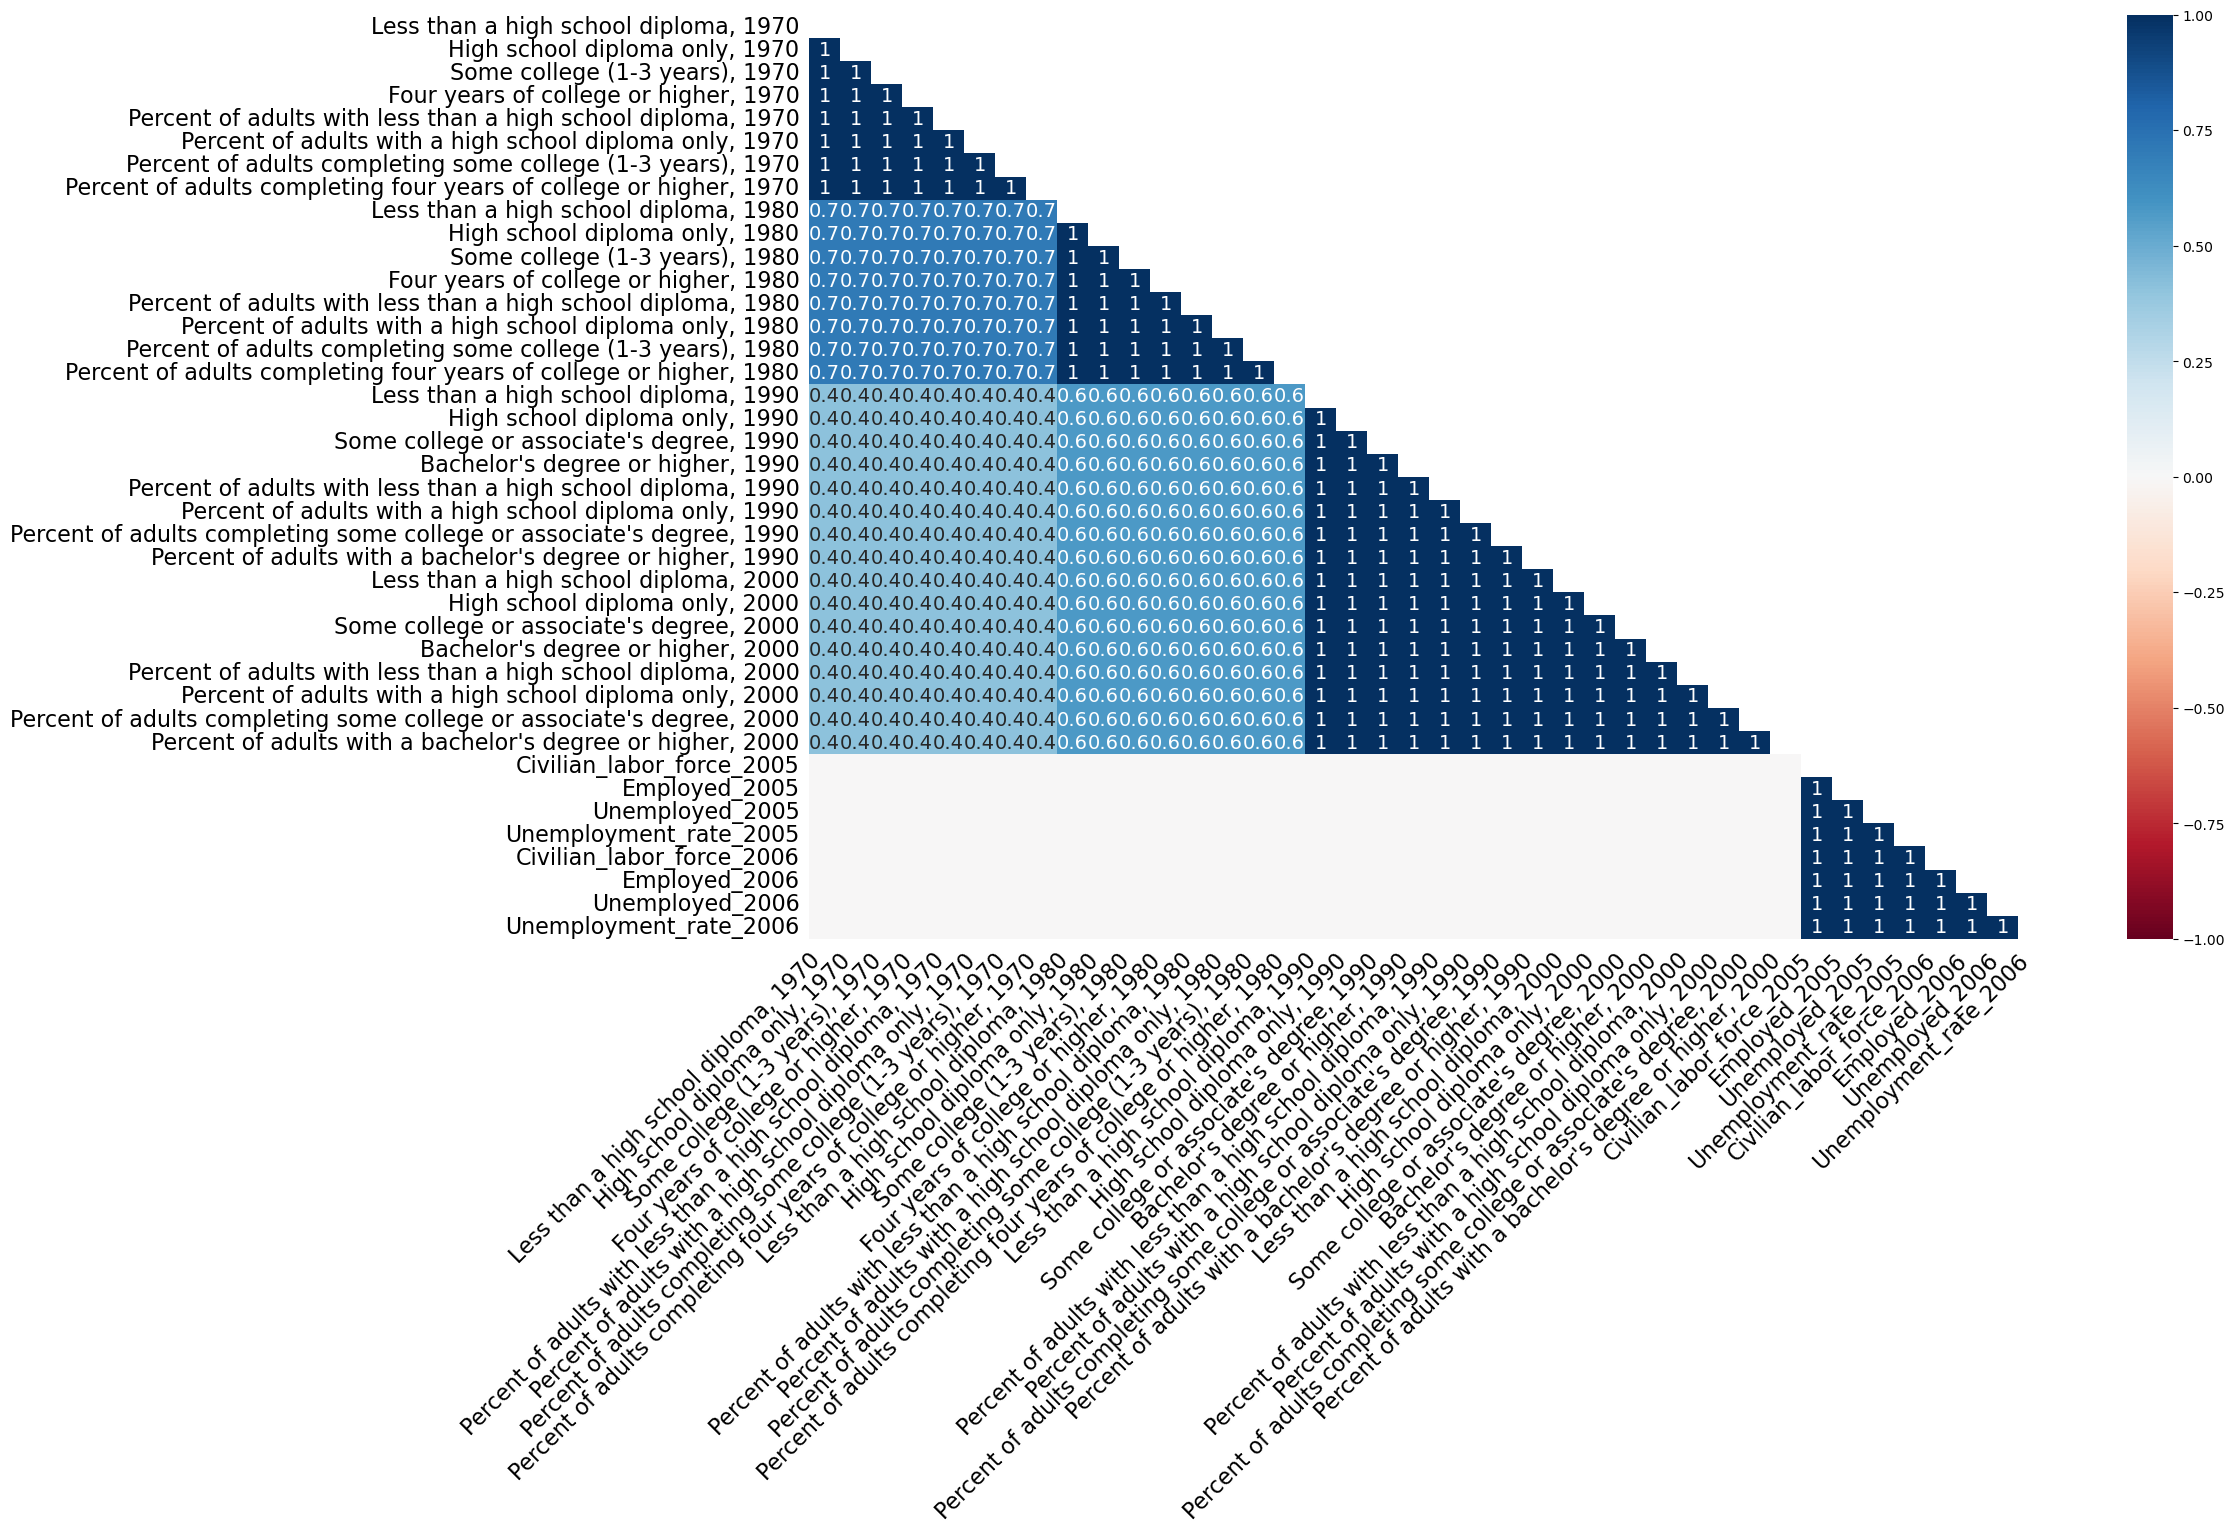

In [66]:
msno.heatmap(data)

On peut constater qu'il y a une très forte corrélation entre les valeurs manquantes donc la méthode adaptée pour traiter ses valeurs manquantes est la méthode KNN. Nous allons l'appliquer pour nos variables quantitatives. 

In [67]:
# séparation des variables quantitatives
vari_quant = pd.DataFrame(data.select_dtypes(include=['number']))

# Normalisation des variables quantitatives
imputer = KNNImputer(n_neighbors= 5)

#Appliquer le modèle KNN
df_imputed = imputer.fit_transform(vari_quant)
numeric_data_imputed = pd.DataFrame(df_imputed, columns = vari_quant.columns)

Passons au traitement des valeurs abérrantes. Ici, nous utiliserons la méthode IQR 

In [68]:
# Détection et traitement des valeurs abérrantes
numeric_data_imputed = numeric_data_imputed.drop(columns='target_2020')

def detect_and_replace_outliers_iqr(numeric_data_imputed):
    if not isinstance(numeric_data_imputed, pd.DataFrame):
        raise ValueError("L'entrée doit être un DataFrame Pandas.")
    
    # Fonction pour détecter les valeurs aberrantes
    def outlier_mask(col):
        Q1 = col.quantile(0.25)
        Q3 = col.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return (col < lower_bound) | (col > upper_bound)

    # Détection des valeurs aberrantes
    outliers = numeric_data_imputed.apply(outlier_mask)

    # Remplacement des valeurs aberrantes par la moyenne de la colonne
    for col in numeric_data_imputed.columns:
        mean_value = numeric_data_imputed[col].mean()  # Calcul de la moyenne
        numeric_data_imputed.loc[outliers[col], col] = mean_value  # Remplacement
    
    print(outliers.sum(), "\nTotal:", outliers.sum().sum(), "valeurs aberrantes remplacées par la moyenne.")

    return numeric_data_imputed


# Exemple d'utilisation
numeric_data_cleaned = detect_and_replace_outliers_iqr(numeric_data_imputed)

# Séparation des variables qualitatives 
vari_quali = data[['State', 'Area_Name', 'county_name', 'FIPStxt', 'target_2020']]

# Reconstitition de la base 
data_cleaned = pd.merge(vari_quali, numeric_data_cleaned , on= ['FIPStxt'], how= 'outer')
data_cleaned

print(f"Le nombre de valeur manquante est : {data_cleaned.isnull().sum().sum()} et la dimension de la base otenue est : {data_cleaned.shape}")



FIPStxt                                        0
2003 Rural-urban Continuum Code                0
2003 Urban Influence Code                      0
2013 Rural-urban Continuum Code                0
2013 Urban Influence Code                      0
                                            ... 
Employed_2019                                446
Unemployed_2019                              423
Unemployment_rate_2019                        94
Median_Household_Income_2019                 143
Med_HH_Income_Percent_of_State_Total_2019    101
Length: 307, dtype: int64 
Total: 97634 valeurs aberrantes remplacées par la moyenne.
Le nombre de valeur manquante est : 0 et la dimension de la base otenue est : (3112, 311)


## <span style='color:green'> **Etape 2: L’analyse exploratoire** </span>

In [69]:
# séparer les variables qualitative et quantitatives
variable_quant = data_cleaned.select_dtypes(include=['number'])
variable_quali = data_cleaned.select_dtypes(exclude=['number'])

##### * <span style='color: pink'> **Analyse univariée**  </span>

Vérifions les statistiques générales de notre base : 

In [70]:
# les statistique générale des variables quantitatives de la base
Table_analyse_uni_quant = (data_cleaned.drop(columns=['FIPStxt', '2003 Rural-urban Continuum Code', '2003 Urban Influence Code', '2013 Rural-urban Continuum Code', '2013 Urban Influence Code'])).describe()
Table_analyse_uni_quant

,target_2020,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Less than a high school diploma, 1980",...,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
count,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,...,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000
mean,0.827121,7867.810847,4349.146998,1357.568450,1204.921569,55.373380,28.406459,8.805809,6.690167,7140.525705,...,20093.780407,19279.746015,799.427926,3.968806,20260.738287,19469.546920,769.643223,3.820510,53637.928462,87.556719
std,0.378204,5986.903558,3878.747181,1279.836359,1270.066051,12.712787,8.124276,3.411844,2.537342,5504.292318,...,18986.986054,18231.480797,748.823133,1.125459,19180.060330,18444.559048,713.447297,1.066981,10684.947332,16.258333
min,0.000000,33.000000,8.000000,0.000000,0.000000,15.900000,5.800000,0.000000,0.000000,31.000000,...,211.000000,205.000000,4.000000,1.300000,223.000000,212.000000,4.000000,0.700000,24732.000000,44.147053
25%,1.000000,3040.750000,1265.750000,376.000000,277.750000,45.700000,21.900000,6.100000,4.800000,2665.500000,...,5013.000000,4772.750000,200.750000,3.100000,4977.250000,4777.250000,196.750000,3.000000,46181.000000,76.455667
50%,1.000000,5956.500000,2757.000000,801.000000,598.000000,54.000000,29.400000,8.600000,6.400000,5459.000000,...,11694.500000,11216.000000,486.000000,3.900000,11758.500000,11277.000000,467.000000,3.700000,53257.000000,86.775574
75%,1.000000,11981.500000,6794.000000,2024.000000,1713.000000,65.900000,35.000000,11.100000,8.000000,11228.750000,...,31877.000000,30510.250000,1277.000000,4.700000,32166.750000,30790.500000,1238.750000,4.500000,60039.500000,97.308805
max,1.000000,25312.000000,15047.000000,4492.000000,3826.000000,88.400000,47.900000,18.800000,14.500000,24028.000000,...,71644.000000,68995.000000,2891.000000,7.300000,72712.000000,69798.000000,2801.000000,6.900000,84986.000000,133.846725


On constate que 
- La moyenne de personnes ayant moins d'un diplôme d'études secondaires (Less than a high school diploma) a diminué entre 1970 (7867.81084664389) et 2019 (3556.356086770838). Il y a aussi une amélioration chez les personnes ayant suivi au moins quelques années d’université. Globalement, on peut dire qu'il y a une amélioration du niveau d'éducation avec le temps.

- Le taux de chômage de 2003 (Unemployment_rate_2003) à 2019 a évolué, avec des fluctuations selon les périodes mais de facon génerale, il y a une amélioration du marché du travail,

- Entre les années 2010 et 2019 il y a eu une croissance de la moyenne de l'estimation de la population résidente de  41564.86052993305 à 42647.922182810056. 


Traçons le diagramme en barre pour visualiser les résultats de chaque parti :

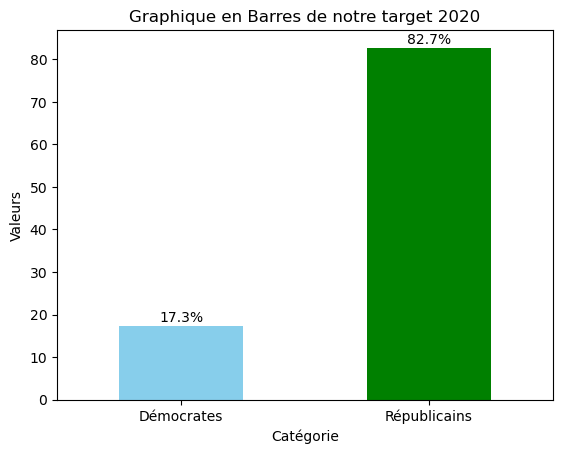

<Axes: xlabel='State'>

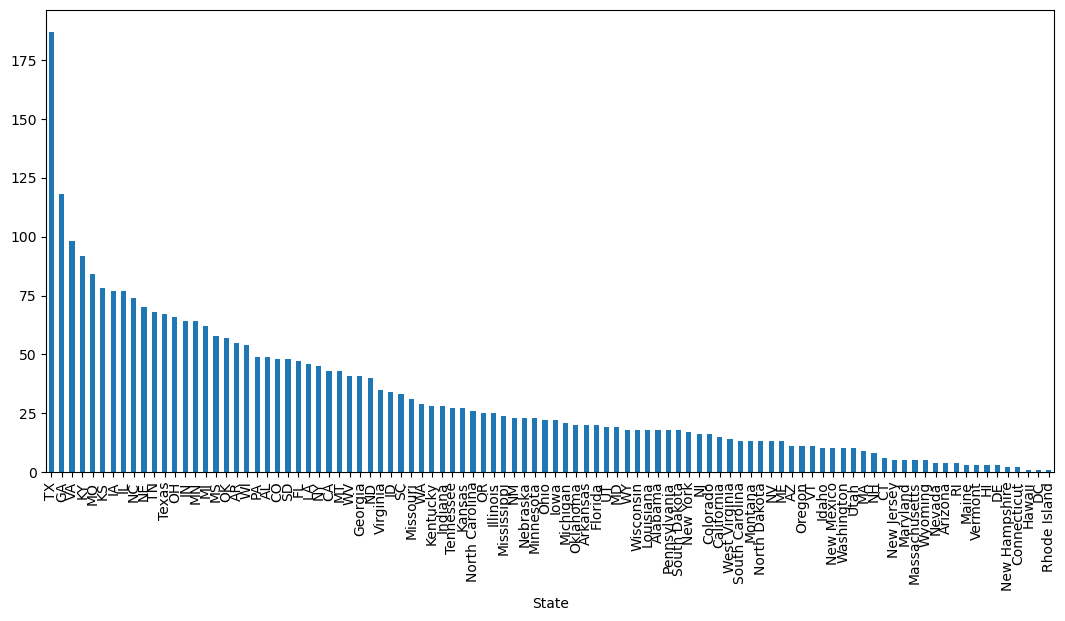

In [71]:
count_target = data_cleaned['target_2020'].value_counts() 
target_pourc = (count_target / count_target.sum()) * 100
table_target = pd.DataFrame ({'pourcentage taget' : target_pourc})

# Tracer le graphique en barres
ax = target_pourc.sort_index().plot(kind='bar', color=['skyblue', 'green'], legend=False)

# Ajouter des annotations (pourcentages)
for i, percentage in enumerate(target_pourc.sort_index()):
    plt.text(i, percentage + 1, f"{percentage:.1f}%", ha='center')

# Personnalisation
plt.xlabel('Catégorie')
plt.ylabel('Valeurs')
plt.xticks([0, 1], ['Démocrates', 'Républicains'], rotation=0)
plt.title('Graphique en Barres de notre target 2020')
plt.show()


data_cleaned['State'].value_counts().plot.bar(figsize=(13, 6))

- les Republicains ont remporté les élections a un pourcentage de 82,7, ce qui très élévé. 
- Le Texas(TX) est la modalité ayant plus de fréquence 

Visualisons également les résultats des années précédentes :

Distribution de target_2008 :
target_2008
1    2237
0     875
Name: count, dtype: int64

Distribution de target_2012 :
target_2012
1    2426
0     686
Name: count, dtype: int64

Distribution de target_2016 :
target_2016
1    2625
0     487
Name: count, dtype: int64



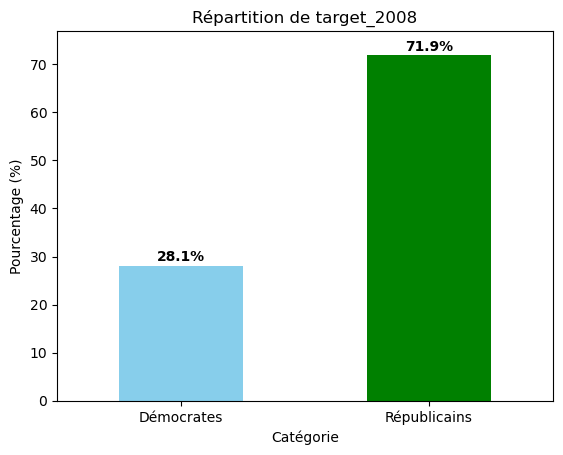

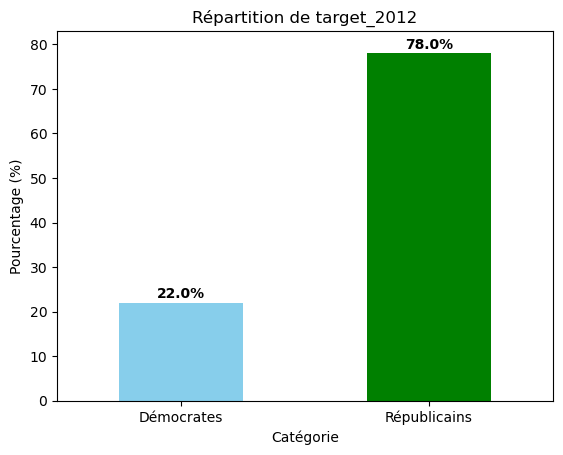

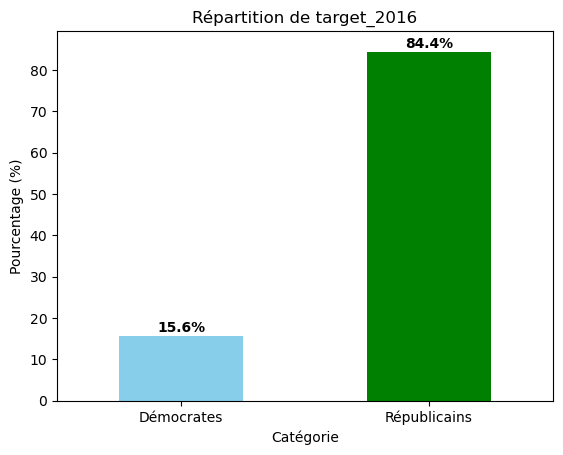

In [72]:
#Création des target des années antérieurs 
data_resutat_08_16['target_2008'] = (data_resutat_08_16['gop_2008'] > data_resutat_08_16['dem_2008']).astype(int)
data_resutat_08_16['target_2012'] = (data_resutat_08_16['gop_2012'] > data_resutat_08_16['dem_2012']).astype(int)
data_resutat_08_16['target_2016'] = (data_resutat_08_16['gop_2016'] > data_resutat_08_16['dem_2016']).astype(int)


# Appliquer value_counts() sur plusieurs colonnes
for col in ['target_2008', 'target_2012', 'target_2016']:
    print(f"Distribution de {col} :\n{data_resutat_08_16[col].value_counts()}\n")

    

data_target_08_16 = data_resutat_08_16[['target_2008', 'target_2012', 'target_2016']]

# Boucle pour générer les graphiques pour chaque variable
for var in data_target_08_16:
    count_var = data_resutat_08_16[var].value_counts()
    pourc_var = (count_var / count_var.sum()) * 100

    # Tracer le graphique en barres
    ax = pourc_var.sort_index().plot(kind='bar', color=['skyblue', 'green'], legend=False)

    # Ajouter des annotations (pourcentages)
    for i, percentage in enumerate(pourc_var.sort_index()):
        ax.text(i, percentage + 1, f"{percentage:.1f}%", ha='center', fontsize=10, fontweight='bold')

            # Personnalisation
    plt.xlabel('Catégorie')
    plt.ylabel('Pourcentage (%)')
    plt.xticks([0, 1], ['Démocrates', 'Républicains'], rotation=0)
    plt.title(f'Répartition de {var}')
    plt.ylim(0, pourc_var.max() + 5)  # Ajuste l'axe Y pour la lisibilité des annotations

    # Affichage du graphique
    plt.show()
   

##### * <span style='color: pink'> **Analyses bivariées**  </span>

Nous allons faire quelques analyses bivariées

Utilisation de la base des élections 2008 à 2016 pour comparaison  les resultats de 2020

In [73]:
data_target_08_20 =pd.concat([data_target_08_16, data_cleaned['target_2020']], axis=1) 
data_target_08_20

,target_2008,target_2012,target_2016,target_2020
0,0,1,1,1.0
1,1,1,1,1.0
2,1,1,1,1.0
3,0,0,0,1.0
4,1,1,1,1.0
...,...,...,...,...
3107,0,1,1,1.0
3108,1,1,1,0.0
3109,1,1,1,1.0
3110,1,1,1,1.0


In [74]:
# Créer une table de comparaison pour les différentes années
comparaison = pd.DataFrame({
    'target_2008': data_target_08_20['target_2008'].value_counts(normalize=True) * 100,
    'target_2012': data_target_08_20['target_2012'].value_counts(normalize=True) * 100,
    'target_2016': data_target_08_20['target_2016'].value_counts(normalize=True) * 100,
    'target_2020': data_target_08_20['target_2020'].value_counts(normalize=True) * 100
}).fillna(0)  # Remplir les valeurs manquantes avec 0 si nécessaire

# Afficher la comparaison sous forme de tableau
print(comparaison)


   target_2008  target_2012  target_2016  target_2020
1    71.883033    77.956298      84.3509    82.712082
0    28.116967    22.043702      15.6491    17.287918


D'après nos données, les republicains ont gagné les élections avec un poucentage élevé de 2008 à 2020 ! 

In [75]:
# 1. Analyse bivariée : Qualitative vs Qualitative
chi2_quali = data_cleaned[['target_2020','State', 'Area_Name', 'county_name']]


# Vérifier la corrélation entre les variables qualitatives et le target
def chi2_test(df, target):
    results = {}
    for col in df.columns:
        if col != target:
            # Construction du tableau de contingence
            contingency_table = pd.crosstab(df[col], df[target])
            
            # Test du Chi-2
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            
            # Stocker la p-valeur
            results[col] = {'Chi2': chi2, 'p-value': p}

    return pd.DataFrame.from_dict(results, orient='index').sort_values(by='p-value')

# Appliquer le test de Chi-2
chi2_results = chi2_test( chi2_quali, 'target_2020')
print("\nRésultats du test de Chi-2 :\n", chi2_results)



Résultats du test de Chi-2 :
                     Chi2       p-value
State         686.254217  1.691311e-89
county_name  2132.967903  3.256904e-06
Area_Name    2535.946537  1.131077e-02


- Les trois variables (State, county_name, Area_Name) montrent toutes une corrélation statistiquement significative avec la variable cible (selon la p-value < 0.05).
Cependant, la corrélation est particulièrement forte pour "State", suivie de "county_name", et enfin "Area_Name", bien que cette dernière reste significative.


## <span style='color:green'> Etape 3: La modélisation   </span>




In [76]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import shap

Séparation du target des autres variables de la table : 

In [77]:
# Séparation des données en variables explicatives (X) et variable qualitative (Y)
X = data_cleaned.drop(columns=['target_2020'])
y = data_cleaned['target_2020']

In [78]:
# Séparer les colonnes numériques et catégorielles des variables explicative
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

# Encodage et mise à l'échelle via un Pipeline des variables qualitative
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),# Standardisation des variables numériques 
    ("cat", OneHotEncoder(handle_unknown="ignore", max_categories=10), cat_features)# Encodage des variables catégorielles
])


# 📌 Définition des modèles avec une pipeline intégrée
models = {
    # 🔹 Régression Logistique (modèle baseline)
    "Logistic Regression": Pipeline([
        ("preprocessor", preprocessor),  # Applique le prétraitement
        ("classifier", LogisticRegression(max_iter=500))  # Modèle de régression logistique avec plus d'itérations
    ]),

    # 🔹 Arbre de Décision
    "Decision Tree": Pipeline([
        ("preprocessor", preprocessor),  # Applique le prétraitement
        ("classifier", DecisionTreeClassifier())  # Modèle d'arbre de décision
    ]),

    # 🔹 Forêt Aléatoire (Random Forest)
    "Random Forest": Pipeline([
        ("preprocessor", preprocessor),  # Applique le prétraitement
        ("classifier", RandomForestClassifier(random_state=42))  # Modèle Random Forest avec un état aléatoire fixé
    ]),

    # 🔹 AdaBoost (Boosting adaptatif)
    "AdaBoost": Pipeline([
        ("preprocessor", preprocessor),  # Applique le prétraitement
        ("classifier", AdaBoostClassifier(random_state=42))  # Modèle AdaBoost avec un état aléatoire fixé
    ])
}


Définition des hyperparamètres avec la recherche par grille et évaluation de nos modèles : 

In [79]:
# 📌 Définition des hyperparamètres à tester avec GridSearchCV
param_grids = {
    "Logistic Regression": {"classifier__C": [0.1, 1, 10]},  # Force de régularisation (plus C est grand, moins il y a de régularisation)
    "Decision Tree": {"classifier__max_depth": [3, 5, 10]},  # Profondeur maximale de l'arbre (contrôle le surajustement)
    "Random Forest": {  
        "classifier__n_estimators": [50, 100, 200],  # Nombre d'arbres dans la forêt
        "classifier__max_depth": [5, 10]  # Profondeur maximale des arbres
    },
    "AdaBoost": {
        "classifier__n_estimators": [50, 100, 200],  # Nombre de classificateurs faibles
        "classifier__learning_rate": [0.01, 0.1, 1]  # Taux d’apprentissage (impact sur le poids des erreurs)
    }
}

# 📌 Séparation des données en ensemble d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Dictionnaire pour stocker les meilleurs modèles après optimisation
best_models = {}

# 📌 Entraînement et optimisation de chaque modèle avec GridSearchCV
for name, pipeline in models.items():
    print(f"🔍 Optimisation du modèle : {name}")
    
    # Création de la recherche d'hyperparamètres avec validation croisée (5 folds)
    grid_search = GridSearchCV(
        pipeline,                 # Pipeline contenant prétraitement + modèle
        param_grids[name],        # Hyperparamètres à tester
        cv=5,                     # Validation croisée en 5 folds
        scoring="accuracy",       # Score d'évaluation basé sur l'accuracy
        n_jobs=-1,                # Utilisation de tous les cœurs disponibles pour accélérer l'exécution
        verbose=1                 # Affichage du processus d'optimisation
    )

    # 📌 Entraînement du modèle avec les différentes combinaisons d'hyperparamètres
    grid_search.fit(X_train, y_train)

    # 📌 Stocker le meilleur modèle trouvé
    best_models[name] = grid_search.best_estimator_

    # 📌 Afficher les meilleurs hyperparamètres sélectionnés
    print(f"✅ Meilleurs hyperparamètres pour {name} : {grid_search.best_params_}")


🔍 Optimisation du modèle : Logistic Regression
Fitting 5 folds for each of 3 candidates, totalling 15 fits
✅ Meilleurs hyperparamètres pour Logistic Regression : {'classifier__C': 0.1}
🔍 Optimisation du modèle : Decision Tree
Fitting 5 folds for each of 3 candidates, totalling 15 fits
✅ Meilleurs hyperparamètres pour Decision Tree : {'classifier__max_depth': 5}
🔍 Optimisation du modèle : Random Forest
Fitting 5 folds for each of 6 candidates, totalling 30 fits
✅ Meilleurs hyperparamètres pour Random Forest : {'classifier__max_depth': 10, 'classifier__n_estimators': 200}
🔍 Optimisation du modèle : AdaBoost
Fitting 5 folds for each of 9 candidates, totalling 45 fits


c:\Users\BALLOGOU Edith\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


✅ Meilleurs hyperparamètres pour AdaBoost : {'classifier__learning_rate': 1, 'classifier__n_estimators': 200}


In [80]:
# Séparer les colonnes numériques et catégorielles des variables explicative
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

# Encodage et mise à l'échelle via un Pipeline des variables qualitative
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),# Standardisation des variables numériques 
    ("cat", OneHotEncoder(handle_unknown="ignore", max_categories=10), cat_features)# Encodage des variables catégorielles
])


# 📌 Définition des modèles avec une pipeline intégrée
models = {
    # 🔹 Régression Logistique (modèle baseline)
    "Logistic Regression": Pipeline([
        ("preprocessor", preprocessor),  # Applique le prétraitement
        ("classifier", LogisticRegression(max_iter=500))  # Modèle de régression logistique avec plus d'itérations
    ]),

    # 🔹 Arbre de Décision
    "Decision Tree": Pipeline([
        ("preprocessor", preprocessor),  # Applique le prétraitement
        ("classifier", DecisionTreeClassifier())  # Modèle d'arbre de décision
    ]),

    # 🔹 Forêt Aléatoire (Random Forest)
    "Random Forest": Pipeline([
        ("preprocessor", preprocessor),  # Applique le prétraitement
        ("classifier", RandomForestClassifier(random_state=42))  # Modèle Random Forest avec un état aléatoire fixé
    ]),

    # 🔹 AdaBoost (Boosting adaptatif)
    "AdaBoost": Pipeline([
        ("preprocessor", preprocessor),  # Applique le prétraitement
        ("classifier", AdaBoostClassifier(random_state=42))  # Modèle AdaBoost avec un état aléatoire fixé
    ])
}



📌 Modèle : Logistic Regression
Accuracy : 0.8764 | F1-score : 0.9252


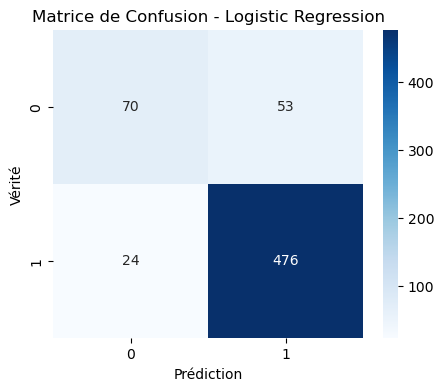


📌 Modèle : Decision Tree
Accuracy : 0.8523 | F1-score : 0.9114


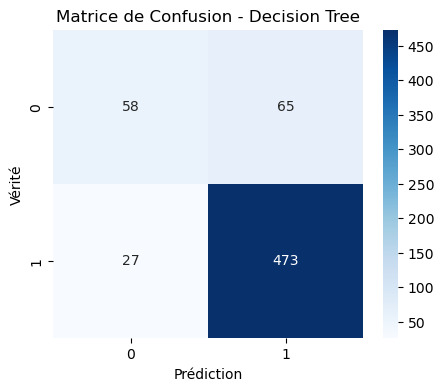


📌 Modèle : Random Forest
Accuracy : 0.8828 | F1-score : 0.9301


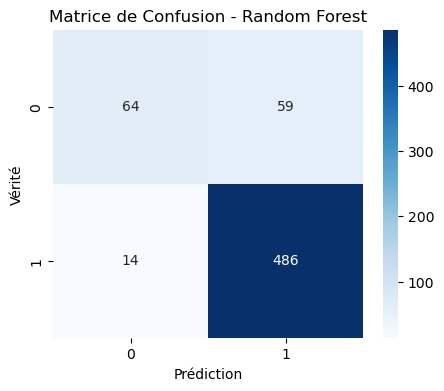


📌 Modèle : AdaBoost
Accuracy : 0.8684 | F1-score : 0.9204


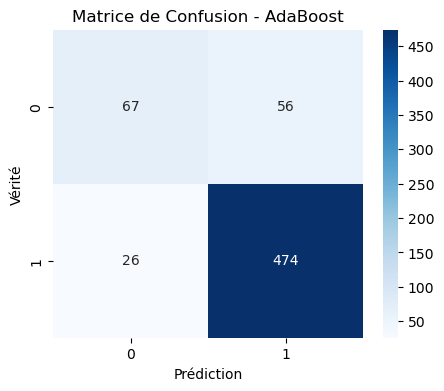

In [81]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 Boucle sur chaque modèle optimisé
for name, model in best_models.items():
    print(f"\n📌 Modèle : {name}")
    
    # 📌 Prédiction sur le test set
    y_pred = model.predict(X_test)
    
    # 📌 Calcul des métriques
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy : {acc:.4f} | F1-score : {f1:.4f}")
    
    # 📌 Matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)

    # 📊 Affichage de la matrice de confusion avec Seaborn
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Prédiction")
    plt.ylabel("Vérité")
    plt.title(f"Matrice de Confusion - {name}")
    plt.show()


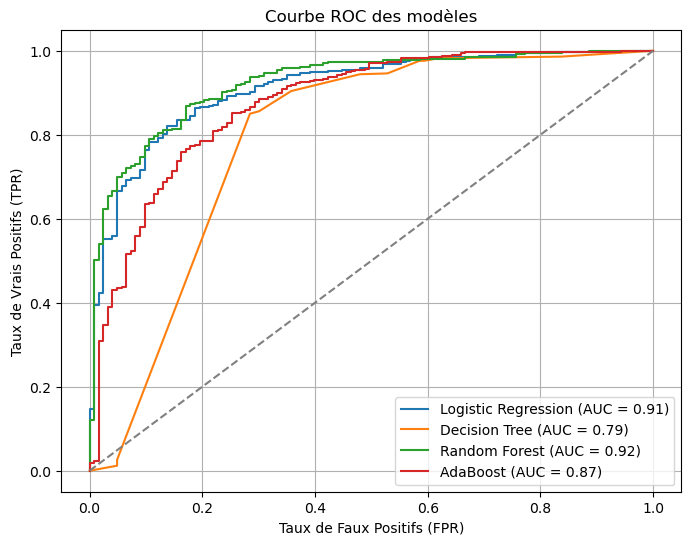

In [82]:
from sklearn.metrics import roc_curve, auc

# 📌 Tracer la courbe ROC pour chaque modèle
plt.figure(figsize=(8, 6))

for name, model in best_models.items():
    # 🔹 Prédictions des probabilités de la classe positive
    if hasattr(model, "predict_proba"):  # Certains modèles comme SVM peuvent ne pas avoir `predict_proba`
        y_score = model.predict_proba(X_test)[:, 1]  # Probabilité d'appartenir à la classe positive
    else:
        y_score = model.decision_function(X_test)  # Pour certains modèles comme SVM

    # 🔹 Calcul des courbes ROC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)  # Calcul de l'aire sous la courbe ROC (AUC)

    # 🔹 Tracé de la courbe ROC
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# 📌 Ajout des labels et du style
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonale (modèle aléatoire)
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC des modèles")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


    Logistic Regression :
        Accuracy (87,64 %) : Prédiction correcte dans 87,64 % des cas. Le modèle est généralement fiable, mais quelques erreurs subsistent.
        F1-score (0.9252) : Bon équilibre entre précision et rappel, indiquant une solide performance pour classer les électeurs dans les bonnes catégories.
        AUC (0.91) : Excellente capacité à différencier les classes.

    Decision Tree :
        Accuracy (85,39 %) : Moins précis que la régression logistique.
        F1-score (0.9121) : Reste élevé malgré l'accuracy plus faible.
        AUC (0.80) : Moins performant pour différencier les classes.

    Random Forest :
        Accuracy (88,28 %) : Le plus précis des modèles.
        F1-score (0.9301) : Excellente gestion de la précision et du rappel.
        AUC (0.92) : Très bonne capacité à faire des distinctions claires entre les classes.

    AdaBoost :
        Accuracy (86,84 %) : Moins élevé que Random Forest, mais toujours bon.
        F1-score (0.9204) : Bon équilibre entre précision et rappel.
        AUC (0.87) : Moins performant que les autres modèles.


        Random Forest est le modèle le plus performant, avec la meilleure accuracy et AUC, ce qui en fait le meilleur choix pour prédire les résultats. Logistic Regression suit de près et peut être une alternative simple mais efficace.

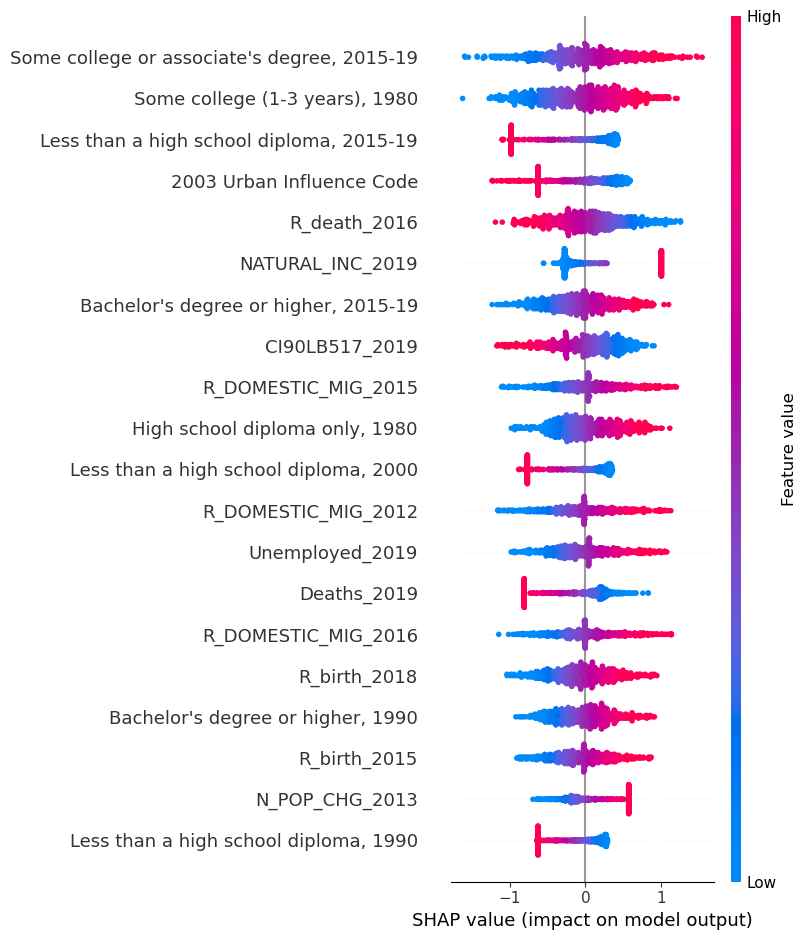

In [83]:
import shap
import matplotlib.pyplot as plt

# 🔹 Explainer SHAP pour Logistic Regression
log_reg_model = best_models["Logistic Regression"]

# On extrait X_test à partir du preprocessor pour garantir qu'il est bien encodé
X_test_transformed = best_models["Logistic Regression"].named_steps['preprocessor'].transform(X_test)

# Utilisation de l'Explainer SHAP pour Logistic Regression
explainer_log_reg = shap.Explainer(log_reg_model.named_steps['classifier'], X_test_transformed)
shap_values_log_reg = explainer_log_reg(X_test_transformed)

# 🔹 Visualiser l'importance des caractéristiques pour Logistic Regression
plt.figure(figsize=(12, 8))  # Agrandissement du graphique
shap.summary_plot(shap_values_log_reg, X_test_transformed, feature_names=X_test.columns)


Ce graphique indique que l’éducation et certaines tendances démographiques ont une influence majeure sur la variable cible du modèle. En résumé :
* Un niveau d’éducation plus élevé (college, bachelor’s degree) a un impact positif sur la prédiction.
* Un faible niveau d’éducation, un chômage élevé et un nombre important de décès influencent négativement la prédiction.
* Certaines variables, comme l’urbanisation et les migrations, ont des effets plus complexes.


FIN